## Objective
##### Predicting energy budget of a building for a month

### Available Data
*   Weather data for 3 years
*   Energy consumption record of 3 years
*   Energy cost of a month


In [ ]:
import pandas as pd #For data analysis and manipulation
import numpy as np
import matplotlib.pyplot as plt #For data visualization
import seaborn as sns #For data visualization

##### Loading the building energy consumption data

In [ ]:
Energy1 = pd.read_excel('Building energy consumption racord.xlsx')
Energy1

,Time,building 41
0,2016-01-01 01:00:00,23.783228
1,2016-01-01 02:00:00,23.783228
2,2016-01-01 03:00:00,23.783228
3,2016-01-01 04:00:00,23.783228
4,2016-01-01 05:00:00,23.783228
...,...,...
26298,2018-12-31 19:00:00,18.602723
26299,2018-12-31 20:00:00,18.838200
26300,2018-12-31 21:00:00,18.602723
26301,2018-12-31 22:00:00,18.131768


In [ ]:
#Setting time column as index
Energy = Energy1.set_index('Time')
Energy

,building 41
Time,
2016-01-01 01:00:00,23.783228
2016-01-01 02:00:00,23.783228
2016-01-01 03:00:00,23.783228
2016-01-01 04:00:00,23.783228
2016-01-01 05:00:00,23.783228
...,...
2018-12-31 19:00:00,18.602723
2018-12-31 20:00:00,18.838200
2018-12-31 21:00:00,18.602723


In [ ]:
#description of data
Energy.describe()

,building 41
count,26303.000000
mean,25.694969
std,6.317738
min,15.541515
25%,20.957498
50%,23.783228
75%,28.728255
max,59.340330


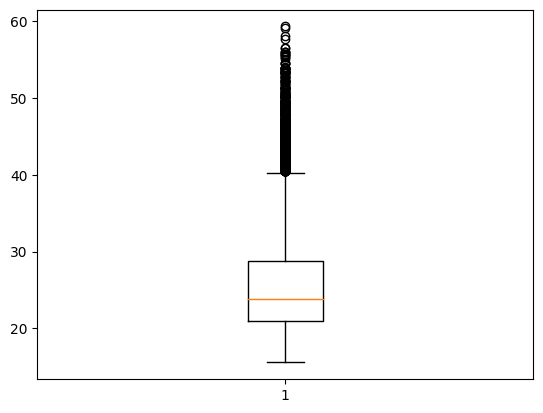

In [ ]:
plt.boxplot(Energy['building 41'])
plt.show()

<Axes: ylabel='building 41'>

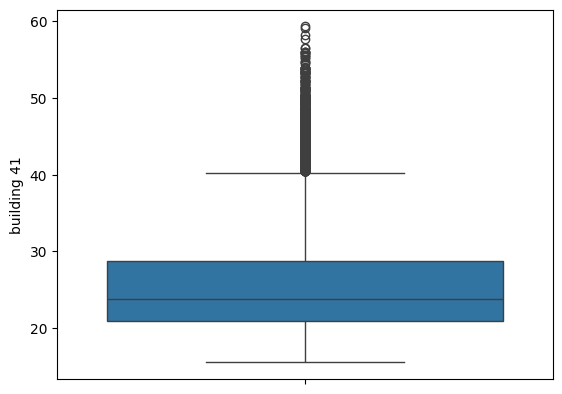

In [ ]:
sns.boxplot(Energy['building 41'])

##### Loading the weather data

In [ ]:
dataset = pd.read_excel('WeatherData.xlsx')
dataset

,Time,month,HH,TD,U,Temp,RH,Q,DR,FF,FX,P
0,2016-01-01 01:00:00,1,1,38,82,6.6,0.82,0,0,30,70,10224
1,2016-01-01 02:00:00,1,2,43,83,7.0,0.83,0,0,40,80,10228
2,2016-01-01 03:00:00,1,3,46,91,5.9,0.91,0,0,30,80,10232
3,2016-01-01 04:00:00,1,4,36,96,4.2,0.96,0,0,20,40,10237
4,2016-01-01 05:00:00,1,5,37,98,4.0,0.98,0,0,20,30,10240
...,...,...,...,...,...,...,...,...,...,...,...,...
26298,2018-12-31 19:00:00,12,19,78,93,8.7,0.93,0,0,30,60,10341
26299,2018-12-31 20:00:00,12,20,74,92,8.5,0.92,0,0,30,50,10338
26300,2018-12-31 21:00:00,12,21,66,89,8.2,0.89,0,0,40,60,10336
26301,2018-12-31 22:00:00,12,22,68,94,7.6,0.94,0,0,40,70,10332


In [ ]:
dataset = dataset.set_index('Time')
dataset

,month,HH,TD,U,Temp,RH,Q,DR,FF,FX,P
Time,,,,,,,,,,,
2016-01-01 01:00:00,1,1,38,82,6.6,0.82,0,0,30,70,10224
2016-01-01 02:00:00,1,2,43,83,7.0,0.83,0,0,40,80,10228
2016-01-01 03:00:00,1,3,46,91,5.9,0.91,0,0,30,80,10232
2016-01-01 04:00:00,1,4,36,96,4.2,0.96,0,0,20,40,10237
2016-01-01 05:00:00,1,5,37,98,4.0,0.98,0,0,20,30,10240
...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 19:00:00,12,19,78,93,8.7,0.93,0,0,30,60,10341
2018-12-31 20:00:00,12,20,74,92,8.5,0.92,0,0,30,50,10338
2018-12-31 21:00:00,12,21,66,89,8.2,0.89,0,0,40,60,10336


In [ ]:
#Concating the weather and energy datasets
df = pd.concat([dataset,Energy],axis=1)
df

,month,HH,TD,U,Temp,RH,Q,DR,FF,FX,P,building 41
Time,,,,,,,,,,,,
2016-01-01 01:00:00,1,1,38,82,6.6,0.82,0,0,30,70,10224,23.783228
2016-01-01 02:00:00,1,2,43,83,7.0,0.83,0,0,40,80,10228,23.783228
2016-01-01 03:00:00,1,3,46,91,5.9,0.91,0,0,30,80,10232,23.783228
2016-01-01 04:00:00,1,4,36,96,4.2,0.96,0,0,20,40,10237,23.783228
2016-01-01 05:00:00,1,5,37,98,4.0,0.98,0,0,20,30,10240,23.783228
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 19:00:00,12,19,78,93,8.7,0.93,0,0,30,60,10341,18.602723
2018-12-31 20:00:00,12,20,74,92,8.5,0.92,0,0,30,50,10338,18.838200
2018-12-31 21:00:00,12,21,66,89,8.2,0.89,0,0,40,60,10336,18.602723


In [ ]:
#Checking for any missing data
df.isnull().sum()

month          0
HH             0
TD             0
U              0
Temp           0
RH             0
Q              0
DR             0
FF             0
FX             0
P              0
building 41    0
dtype: int64

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]),
 [Text(0.5, 0, 'month'),
  Text(1.5, 0, 'HH'),
  Text(2.5, 0, 'TD'),
  Text(3.5, 0, 'U'),
  Text(4.5, 0, 'Temp'),
  Text(5.5, 0, 'RH'),
  Text(6.5, 0, 'Q'),
  Text(7.5, 0, 'DR'),
  Text(8.5, 0, 'FF'),
  Text(9.5, 0, 'FX'),
  Text(10.5, 0, 'P'),
  Text(11.5, 0, 'building 41')])

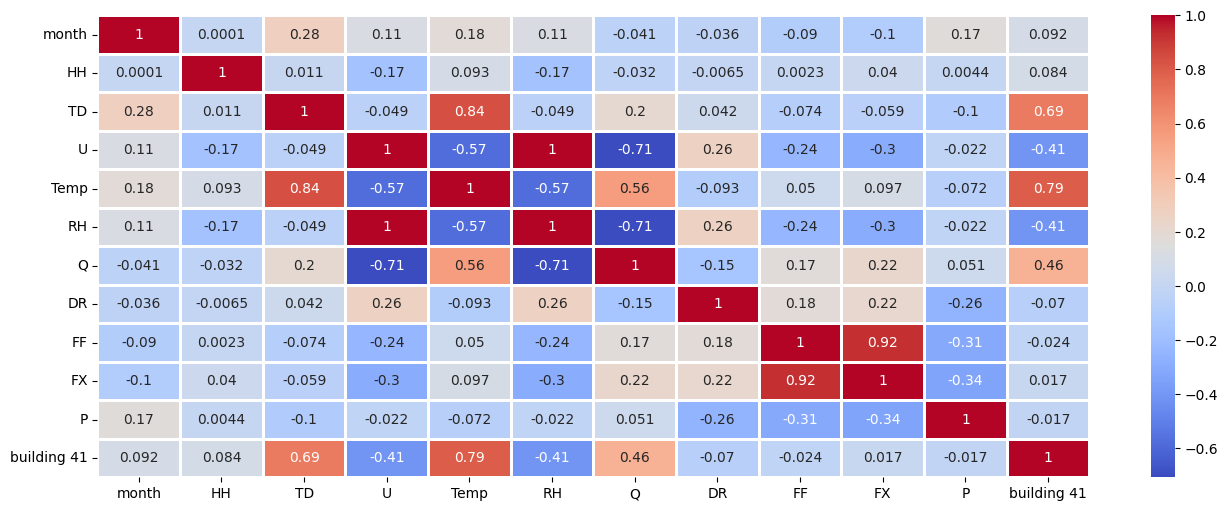

In [ ]:
#Checking the dependency of two variables over each other
plt.figure(figsize=(16,6))
sns.heatmap(df.corr(),annot=True, linewidths=1, fmt=".2g", cmap= 'coolwarm')
plt.xticks(rotation='horizontal')

##### From the heatmap we can see that energy demand is positively correlated with Temp. Relative Humidity(U) and Hourly sum of Precipitation(RH) are two highest negative correlated features and both these are multi-collinear so only one can be taken to predict energy demand.

### Plotting Energy Consumption data against U and Temp

In [ ]:
#Resampling energy, temperature, relative humidty over a week
df_mean_weekly = df['building 41'].resample('W').mean()
df_feature1 = df['Temp'].resample('W').mean()
df_feature2 = df['U'].resample('W').mean()

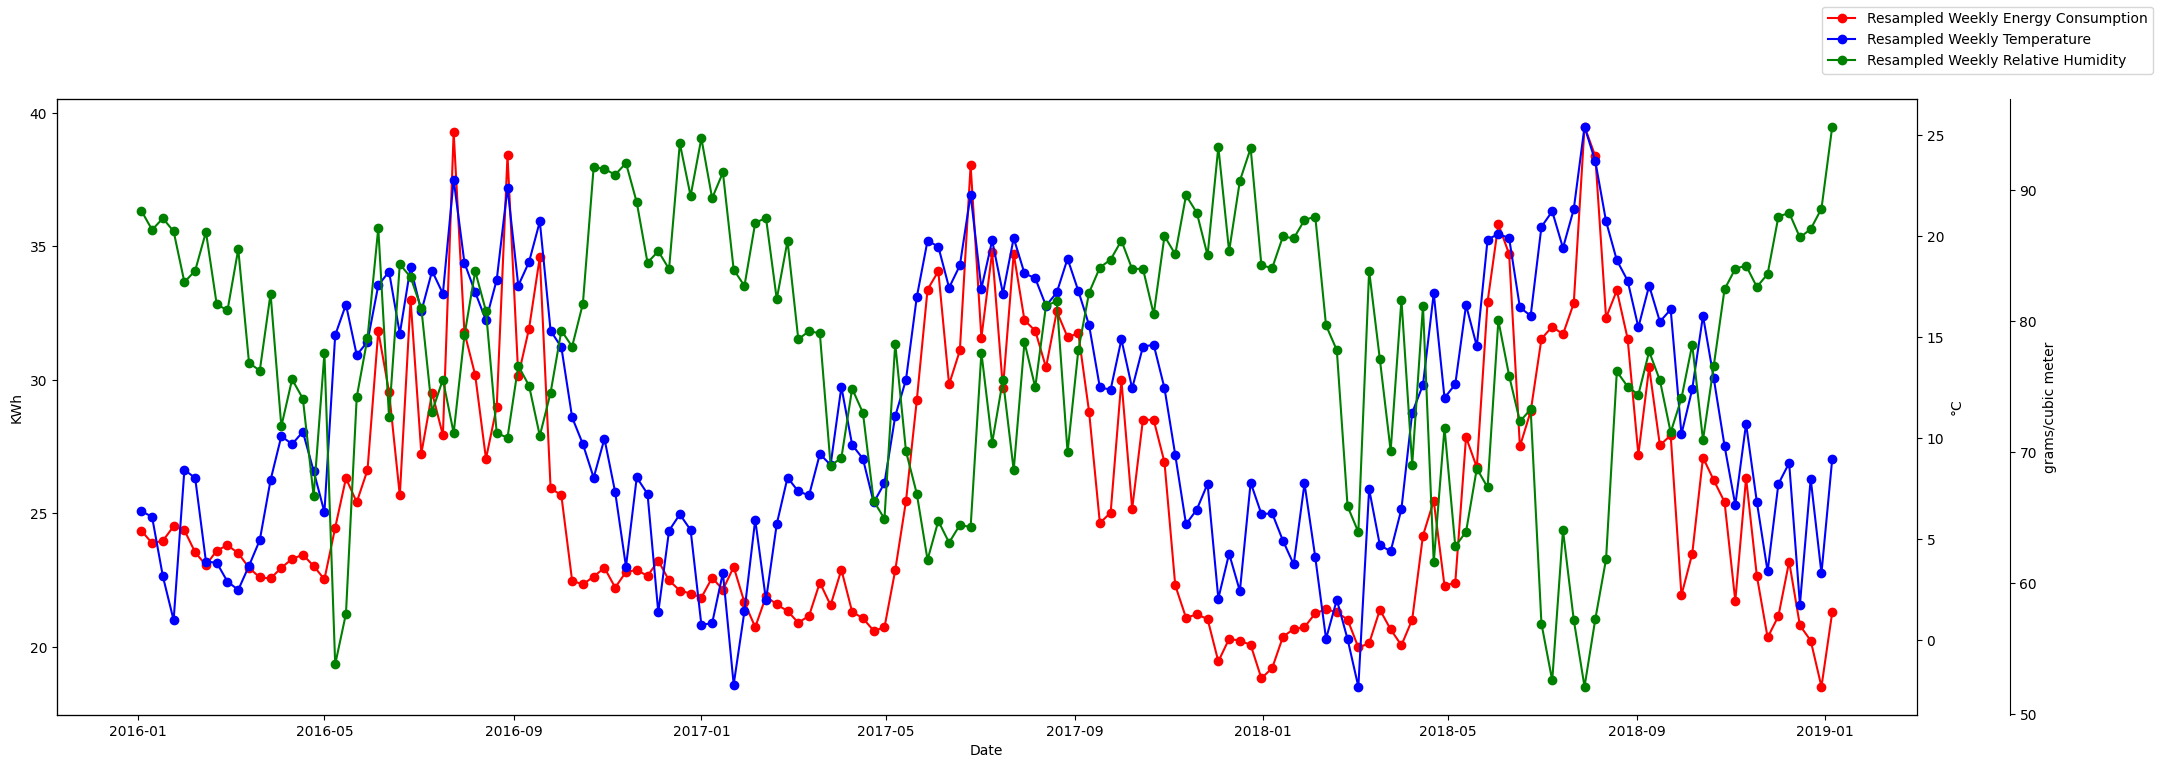

In [ ]:
#plotting the result
fig,ax = plt.subplots(figsize=(24,8))  # Create matplotlib figure
ax.plot(df_mean_weekly.index, df_mean_weekly, color="red",marker="o")
ax.set_ylabel("KWh")
ax.set_xlabel('Date')
ax2 = ax.twinx() #Create a new Axes with an invisible x-axis and an independent y-axis positioned opposite to the original one (i.e. at right).
ax3 = ax.twinx()
ax2.plot(df_mean_weekly.index, df_feature1, color="blue", marker="o")
ax2.set_ylabel("°C")
ax3.plot(df_mean_weekly.index, df_feature2, color="green", marker="o")
ax3.set_ylabel("grams/cubic meter")
ax3.spines["right"].set_position(("axes", 1.05))
fig.legend(["Resampled Weekly Energy Consumption","Resampled Weekly Temperature","Resampled Weekly Relative Humidity"], loc='upper right')
fig.show()


In [ ]:
#Removing features that have low correlational value so that they don't have an effect on our model
dataset_updated = dataset.loc[:, ~dataset.columns.isin(["TD","U","DR","FX"])]
dataset_updated

,month,HH,Temp,RH,Q,FF,P
Time,,,,,,,
2016-01-01 01:00:00,1,1,6.6,0.82,0,30,10224
2016-01-01 02:00:00,1,2,7.0,0.83,0,40,10228
2016-01-01 03:00:00,1,3,5.9,0.91,0,30,10232
2016-01-01 04:00:00,1,4,4.2,0.96,0,20,10237
2016-01-01 05:00:00,1,5,4.0,0.98,0,20,10240
...,...,...,...,...,...,...,...
2018-12-31 19:00:00,12,19,8.7,0.93,0,30,10341
2018-12-31 20:00:00,12,20,8.5,0.92,0,30,10338
2018-12-31 21:00:00,12,21,8.2,0.89,0,40,10336


##### Feature Scaling our data

In [ ]:
from sklearn.preprocessing import StandardScaler
sc1= StandardScaler()
X1 = sc1.fit_transform(dataset_updated)

##### As our relationships are nonlinear we are going to use SVM and RF to develop our model

#### SVM Model

In [ ]:
#Splitting the data into training(80%) and testing(20%) sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X1, Energy, test_size = 0.2, random_state = 0)
y_train

,building 41
Time,
2016-11-29 03:00:00,22.370362
2018-01-29 11:00:00,24.725137
2018-07-03 20:00:00,36.028058
2017-09-05 16:00:00,44.034292
2017-03-08 06:00:00,19.309155
...,...
2017-06-30 20:00:00,29.434687
2018-03-29 17:00:00,21.899408
2017-02-14 06:00:00,21.192975


In [ ]:
y_train = y_train.values.ravel()
y_train

array([22.3703625, 24.7251375, 36.0280575, ..., 21.192975 , 19.5446325,
       20.72202  ])

In [ ]:
y_test = y_test.values.ravel()
y_test

array([19.5446325, 32.2604175, 20.0155875, ..., 20.72202  , 28.4927775,
       25.1960925])

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X_train,y_train)

SVR()

In [ ]:
#Predicting on training data
Pred_train = regressor.predict(X_train)
Pred_train

array([22.13648115, 23.4056385 , 35.46444823, ..., 21.2396082 ,
       20.11957167, 19.94807683])

In [ ]:
#To evaluate our model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print(r2_score(y_train,Pred_train))
print(mean_squared_error(y_train,Pred_train))

0.8676607662388549
5.287585695616701


##### Only parameter U is left out of the regression model, as U and RH (Hourly Sum of Precipitation) have a correlation of 100%. As a result, including only one of the two parameters in the model is sufficient.

In [ ]:
X4 = sc1.fit_transform(dataset.loc[:, ~dataset.columns.isin(["U"])])

In [ ]:
#We redefine the data for standard scaling and split into training (80%) and test data (20%)
X_train, X_test, y_train, y_test = train_test_split(X4, Energy, test_size=0.2, random_state=0, shuffle= "False")
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

#Building the regressor and fitting the training data
regr = SVR(kernel='rbf')
regr = regr.fit(X_train, y_train)

predict_train = regr.predict(X_train)

#testing the model training accuracy
print(r2_score(y_train, predict_train))
print(mean_squared_error(y_train, predict_train))

0.8692363907335192
5.224631956934131


In [ ]:
pred_test = regr.predict(X_test)
print(r2_score(y_test, pred_test))
print(mean_squared_error(y_test, pred_test))

0.8656435535968942
5.338927701659932


#### We see the improvement in prediction accuracy when we use all variables despite the low correlation between the added parameters and Energy demand.

Text(0, 0.5, 'kWh')

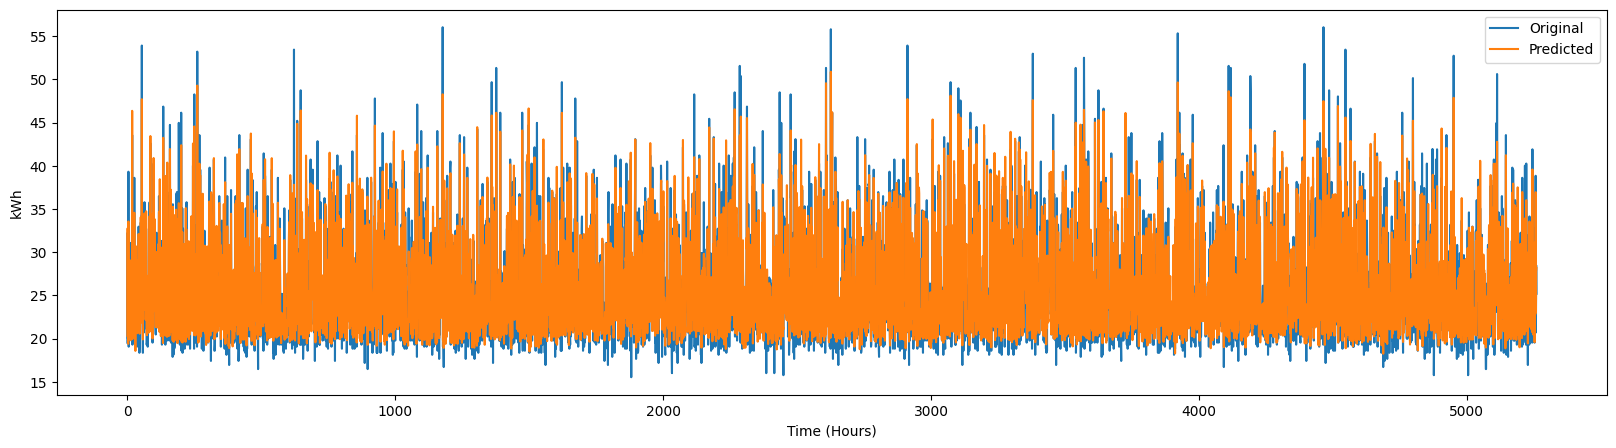

In [ ]:
plt.figure(figsize = (20,5))
plt.plot(y_test, label="Original")
plt.plot(pred_test, label="Predicted")
plt.legend(loc='best')
plt.xlabel('Time (Hours)')
plt.ylabel('kWh')

#### RF Model

In [ ]:
#importing the ensemble module for the random forest regressor from sklearn library
from sklearn.ensemble import RandomForestRegressor

RFReg = RandomForestRegressor(max_depth=10, random_state=0)

# Fitting the regression model to the training data
X_train2, X_test2, y_train2, y_test2 = train_test_split(X4, Energy, test_size=0.2, random_state=0, shuffle= "False")
y_train2 = y_train2.values.ravel()
y_test2 = y_test2.values.ravel()
RFReg.fit(X_train2, y_train2)

#Predicting on the training data (X_train2)
Predicted_Train2= RFReg.predict(X_train2)

#Caculating R2 score and Root mean square error
print(r2_score(y_train2, Predicted_Train2))
print(mean_squared_error(y_train2, Predicted_Train2))

0.916772327031522
3.325343819519643


In [ ]:
#Predicting on the test set (X_test2)
Predicted_Test2 = RFReg.predict(X_test2)

#Caculating R2 score and Root mean square error
print(r2_score(y_test2,Predicted_Test2))
print(mean_squared_error(y_test2,Predicted_Test2))

0.883404937167962
4.633142863596595


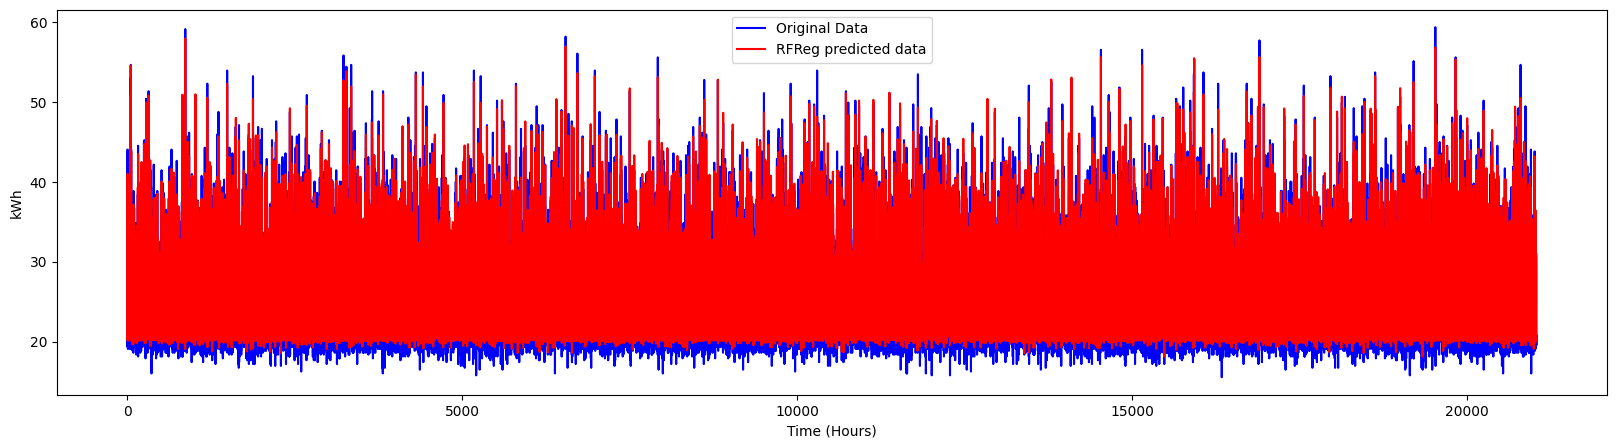

In [ ]:
#Visualising our fit on training set
plt.figure(figsize = (20,5))
plt.plot(y_train2, color="b",label= 'Original Data')
plt.plot(Predicted_Train2, color ="red", label="RFReg predicted data")
plt.xlabel('Time (Hours)')
plt.ylabel('kWh')
plt.legend(loc='best')
plt.show()

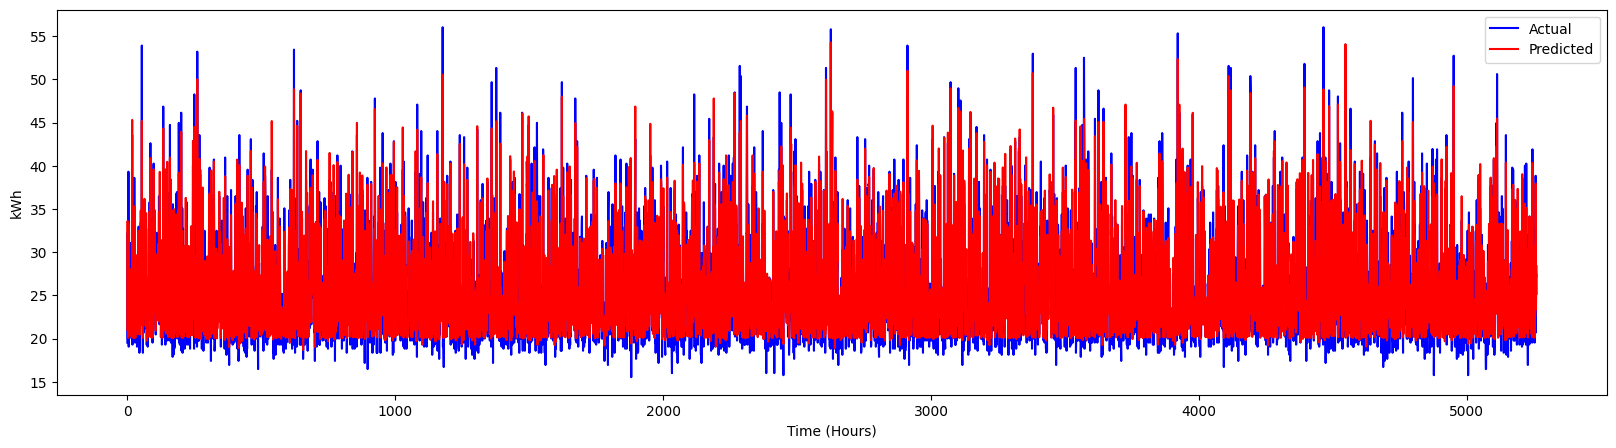

In [ ]:
#Visualising our fit on test set.
plt.figure(figsize = (20,5))
plt.plot(y_test2, color='blue', label="Actual")
plt.plot(Predicted_Test2, color='Red', label="Predicted")
plt.xlabel('Time (Hours)')
plt.ylabel('kWh')
plt.legend(loc='best')

### Budget Allocation using Predictive Modelling

##### With the help of energy price and predicted demand, we can calculate the estimated cost of energy for the month of January. Now we have a trained model

In [ ]:
#Importing the weather cost file
weather_cost = pd.read_excel('Weather_Cost.xlsx')
weather_cost

,Time,month,HH,TD,U,Temp,RH,Q,DR,FF,FX,P
0,2019-01-01 00:00:00,1,1,68,96,73,1,0,6,40,90,10323
1,2019-01-01 01:00:00,1,2,65,94,74,-1,0,0,40,70,10320
2,2019-01-01 02:00:00,1,3,63,93,73,0,0,0,40,70,10314
3,2019-01-01 03:00:00,1,4,61,92,73,0,0,0,50,60,10308
4,2019-01-01 04:00:00,1,5,58,92,69,0,0,0,50,70,10299
...,...,...,...,...,...,...,...,...,...,...,...,...
739,2019-01-31 19:00:00,1,20,-24,93,-15,0,0,0,30,60,9929
740,2019-01-31 20:00:00,1,21,-22,95,-15,0,0,0,30,60,9920
741,2019-01-31 21:00:00,1,22,-24,91,-11,0,0,0,40,70,9911
742,2019-01-31 22:00:00,1,23,-25,87,-6,0,0,0,50,80,9900


In [ ]:
weather_cost = weather_cost.set_index('Time')
weather_cost

,month,HH,TD,U,Temp,RH,Q,DR,FF,FX,P
Time,,,,,,,,,,,
2019-01-01 00:00:00,1,1,68,96,73,1,0,6,40,90,10323
2019-01-01 01:00:00,1,2,65,94,74,-1,0,0,40,70,10320
2019-01-01 02:00:00,1,3,63,93,73,0,0,0,40,70,10314
2019-01-01 03:00:00,1,4,61,92,73,0,0,0,50,60,10308
2019-01-01 04:00:00,1,5,58,92,69,0,0,0,50,70,10299
...,...,...,...,...,...,...,...,...,...,...,...
2019-01-31 19:00:00,1,20,-24,93,-15,0,0,0,30,60,9929
2019-01-31 20:00:00,1,21,-22,95,-15,0,0,0,30,60,9920
2019-01-31 21:00:00,1,22,-24,91,-11,0,0,0,40,70,9911


In [ ]:
#Checking for any missing values
weather_cost.isna().sum()

month    0
HH       0
TD       0
U        0
Temp     0
RH       0
Q        0
DR       0
FF       0
FX       0
P        0
dtype: int64

In [ ]:
#Removing Relative Humidity from the dataset
weather_cost_updated = weather_cost.loc[:, ~weather_cost.columns.isin(['U'])]

In [ ]:
#Scaling the data
X5 = sc1.fit_transform(weather_cost_updated)

In [ ]:
#Predicting the consumption
predicted = RFReg.predict(X5)
predicted.shape

(744,)

In [ ]:
#Converting the predicted array into a dataframe so it is easier when plotting to show the time index
predicted= pd.DataFrame(predicted, columns=['kWh'])
predicted

,kWh
0,32.482513
1,34.189682
2,33.304847
3,32.261885
4,30.038888
...,...
739,21.390449
740,21.425267
741,21.390449
742,21.365725


In [ ]:
#Importing the time index from weather_cost file
predicted['Time']= weather_cost.index
predicted

,kWh,Time
0,32.482513,2019-01-01 00:00:00
1,34.189682,2019-01-01 01:00:00
2,33.304847,2019-01-01 02:00:00
3,32.261885,2019-01-01 03:00:00
4,30.038888,2019-01-01 04:00:00
...,...,...
739,21.390449,2019-01-31 19:00:00
740,21.425267,2019-01-31 20:00:00
741,21.390449,2019-01-31 21:00:00
742,21.365725,2019-01-31 22:00:00


In [ ]:
#Setting time column as index
predicted = predicted.set_index('Time')
predicted

,kWh
Time,
2019-01-01 00:00:00,32.482513
2019-01-01 01:00:00,34.189682
2019-01-01 02:00:00,33.304847
2019-01-01 03:00:00,32.261885
2019-01-01 04:00:00,30.038888
...,...
2019-01-31 19:00:00,21.390449
2019-01-31 20:00:00,21.425267
2019-01-31 21:00:00,21.390449


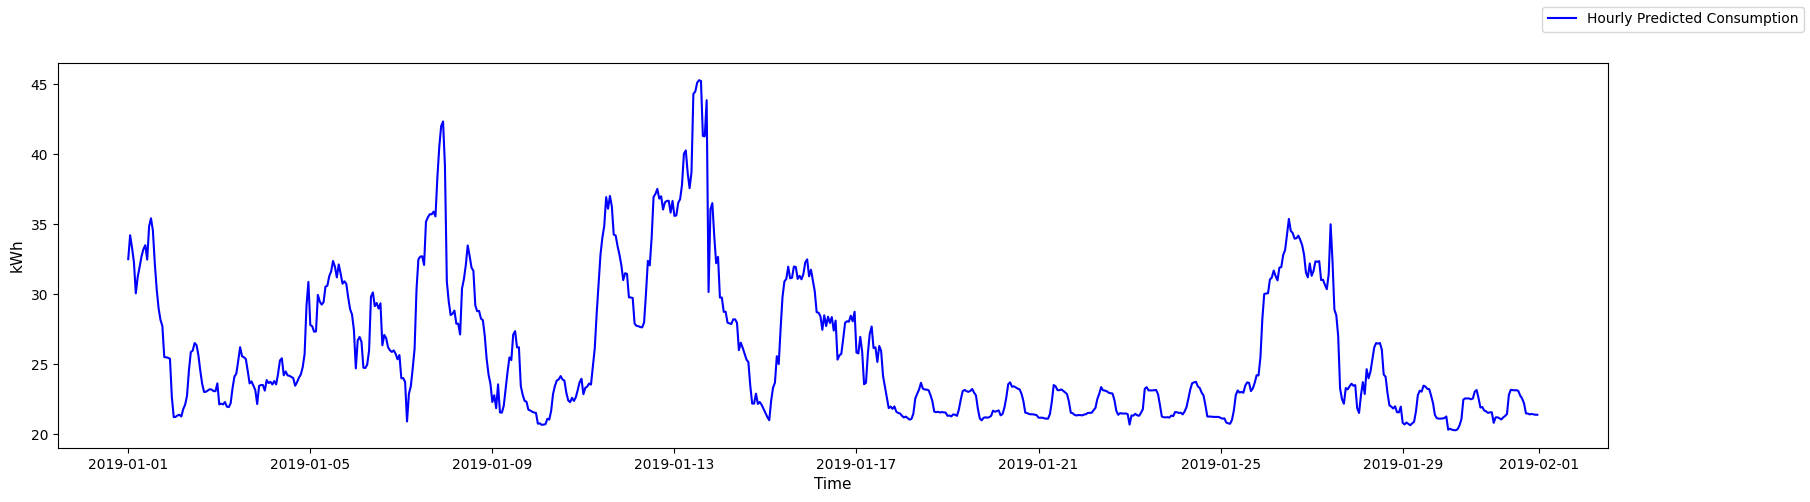

In [ ]:
#Plot the hourly forecast consumption in kWh
fig, ax = plt.subplots(figsize = (20,5))
ax.plot(predicted,  label='Hourly Predicted Consumption',color = 'blue')
ax.set_ylabel('kWh',size=11)
ax.set_xlabel('Time',size=11)
fig.legend()

##### If we consider 0.23cents per kilowatt hour

In [ ]:
#Calculating the hourly consumtion cost.
Hourly_Cost= predicted*0.23
Hourly_Cost = Hourly_Cost.rename(columns={'kWh':'Euros'})
Hourly_Cost

,Euros
Time,
2019-01-01 00:00:00,7.470978
2019-01-01 01:00:00,7.863627
2019-01-01 02:00:00,7.660115
2019-01-01 03:00:00,7.420234
2019-01-01 04:00:00,6.908944
...,...
2019-01-31 19:00:00,4.919803
2019-01-31 20:00:00,4.927811
2019-01-31 21:00:00,4.919803


In [ ]:
#Resampling hourly cost in daily cost
Daily_Cost = Hourly_Cost.resample("D").sum()
print("Average Daily Cost",Daily_Cost.mean())
print("Total Cost",Daily_Cost.sum())

Average Daily Cost Euros    142.664483
dtype: float64
Total Cost Euros    4422.598981
dtype: float64


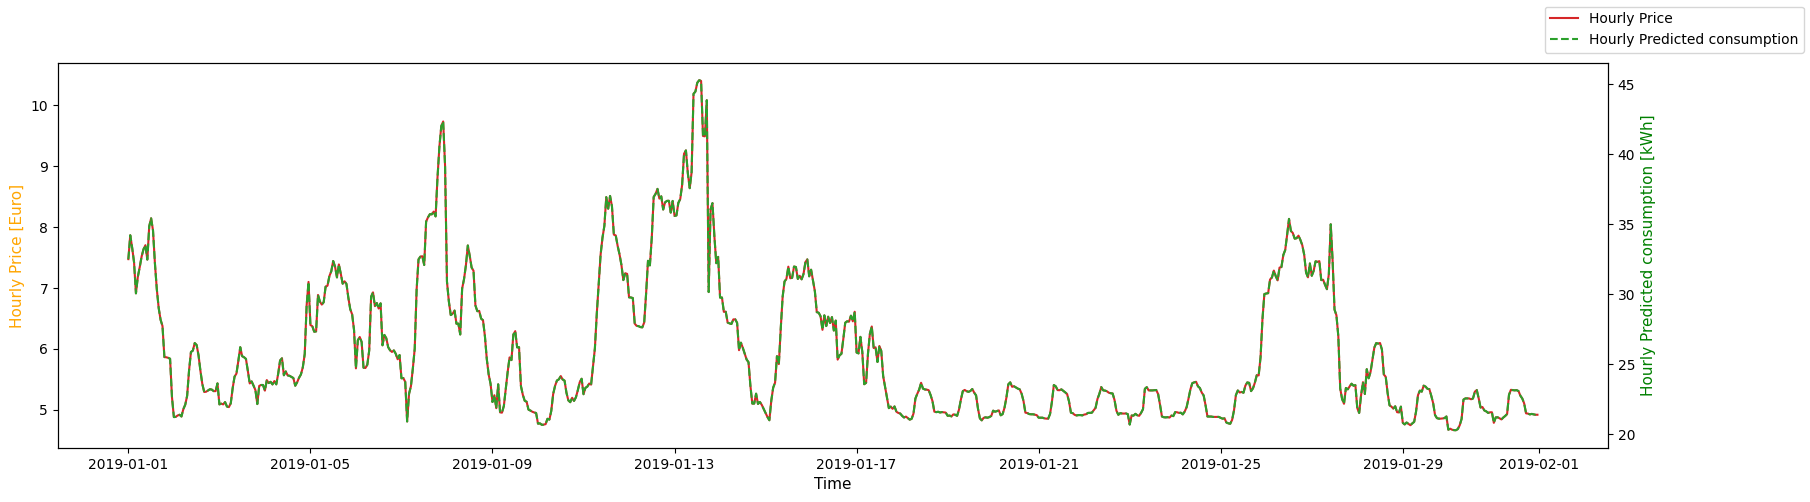

In [ ]:
fig, ax = plt.subplots(figsize = (20,5))
ax2 = ax.twinx()
ax.plot(Hourly_Cost,  label='Hourly Price',color = 'tab:red')
ax2.plot(predicted,  label='Hourly Predicted consumption',color = 'tab:green', linestyle='dashed')
ax.set_ylabel('Hourly Price [Euro]', size=11, color='orange')
ax2.set_ylabel('Hourly Predicted consumption [kWh]',size=11, color='green')
ax.set_xlabel('Time',size=11)
fig.legend()

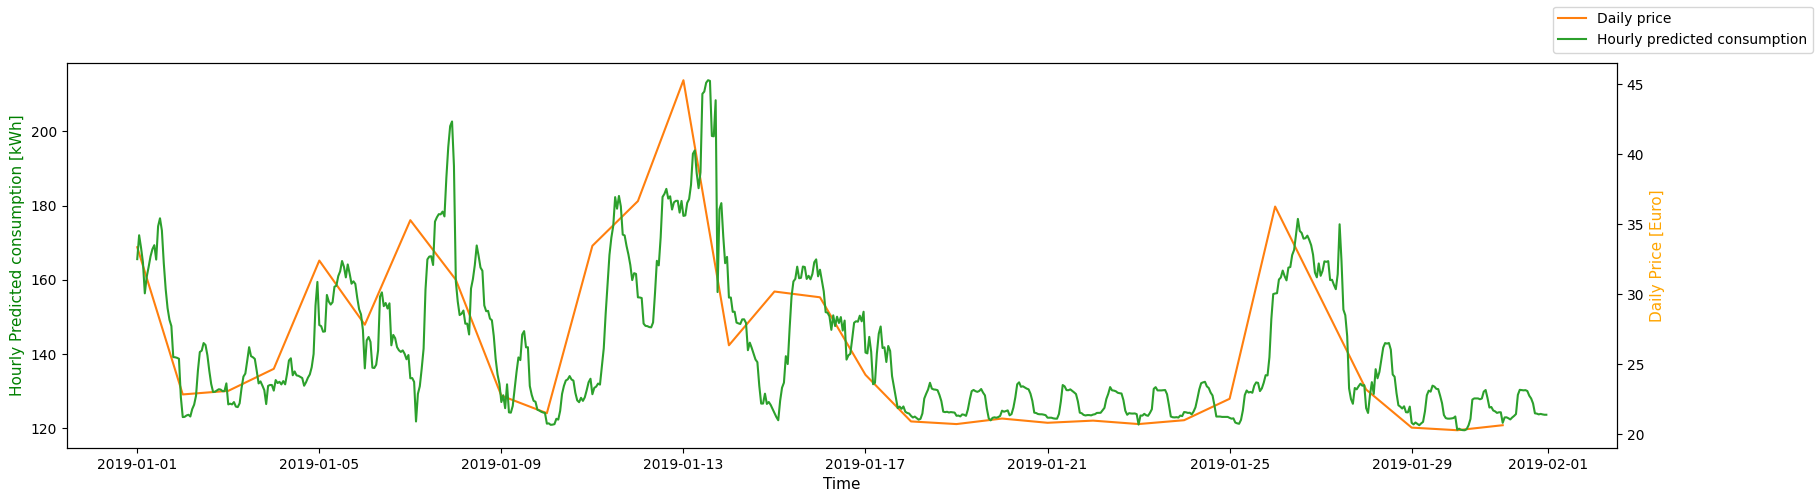

In [ ]:
fig, ax = plt.subplots(figsize=(20,5))
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
ax.plot(Daily_Cost, label= 'Daily price', color = 'tab:orange')
ax2.plot(predicted, label='Hourly predicted consumption', color = 'tab:green')
ax.set_ylabel('Hourly Predicted consumption [kWh]', size=11, color='green')
ax2.set_ylabel('Daily Price [Euro]',size=11, color='orange')
ax.set_xlabel('Time',size=11)
fig.legend()

#### Setting a visual threshold of 150 Euros per day in the forecast

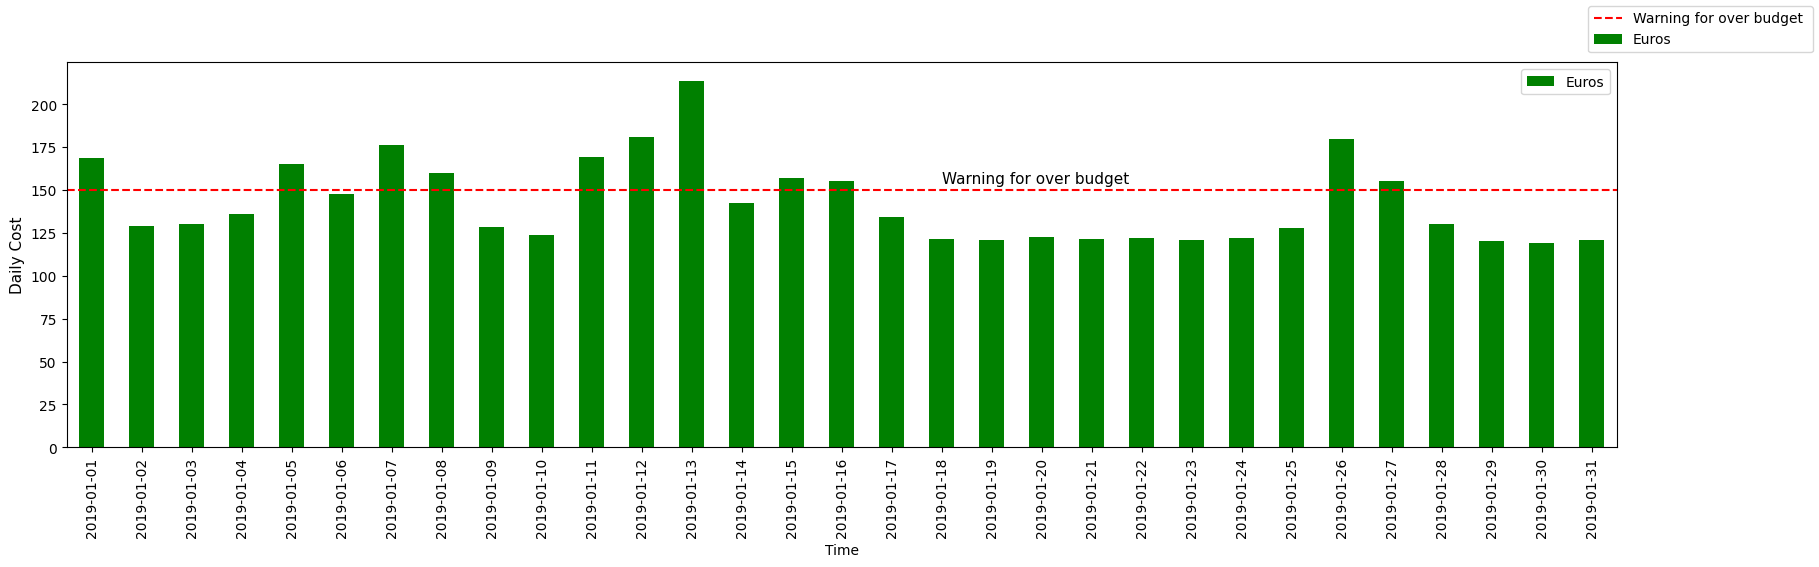

In [ ]:
fig = plt.figure(figsize = (20,5)) # Create matplotlib figure
ax = fig.add_subplot(111) # Create matplotlib axes
Daily_Cost.plot(kind='bar', ax=ax, rot=0,color='green')
ax.axhline(y=150, color='red', linestyle='--', label="Warning for over budget ")
plt.text(17, 154, 'Warning for over budget', fontsize=11)
ax.set_ylabel('Daily Cost', size=11, color='black')
plt.xticks(rotation='vertical')
ax.set_xticklabels([dt.strftime('%Y-%m-%d') for dt in Daily_Cost.index])
fig.legend()